In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

['Malgun Gothic']


In [3]:
df_month=pd.read_csv('../data/month_nowon.csv')
df_month=df_month.dropna()
df_month.head()

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,전월세(만원),...,브랜드,주차관제,승강기,복도유형,난방방식,단지명(K-apt),일반관리,경비관리,청소관리,임대차3법
18,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,월세,59.87,202002,29,23500,...,0,0.0,5.0,0.0,0.0,공릉건영장미,3.0,2.0,2.0,0
19,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,월세,59.87,202004,11,27000,...,0,0.0,5.0,0.0,0.0,공릉건영장미,3.0,2.0,2.0,0
20,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,월세,59.87,202007,7,26000,...,0,0.0,5.0,0.0,0.0,공릉건영장미,3.0,2.0,2.0,0
21,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,월세,84.88,202007,28,6500,...,0,0.0,5.0,0.0,0.0,공릉건영장미,3.0,2.0,2.0,0
22,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,월세,84.88,202009,12,33000,...,0,0.0,5.0,0.0,0.0,공릉건영장미,3.0,2.0,2.0,1


In [4]:
print(df_month.columns)

Index(['시군구', '번지', '본번', '부번', '단지명', '전월세구분', '전용면적(㎡)', '계약년월', '계약일',
       '전월세(만원)', '층', '세대수', '건축년도', '도로명', '위도', '경도', '초등학교', '병원', '공원',
       '대형마트', '백화점', 'cctv', '주차대수', '브랜드', '주차관제', '승강기', '복도유형', '난방방식',
       '단지명(K-apt)', '일반관리', '경비관리', '청소관리', '임대차3법'],
      dtype='object')


In [5]:
# correlation
var=['전용면적(㎡)','층','세대수','건축년도','초등학교','병원','공원','대형마트','백화점','cctv','주차대수','브랜드','주차관제','승강기','난방방식','복도유형','일반관리','경비관리','청소관리','임대차3법']

for i in range(len(var)):
    corr=np.corrcoef(df_month[var[i]],df_month['전월세(만원)'])[0,1]
    print(var[i],':',corr)

전용면적(㎡) : 0.8478146633700079
층 : 0.08441352181952244
세대수 : -0.22174189456444052
건축년도 : 0.24131784106312032
초등학교 : 0.07530307291272917
병원 : -0.11032968296348866
공원 : 0.1304251469584441
대형마트 : -0.16946012377367026
백화점 : 0.12890829574329157
cctv : 0.14279741623921777
주차대수 : 0.027829731669095126
브랜드 : 0.2443089851822218
주차관제 : 0.07854125967447381
승강기 : 0.09064852743760379
난방방식 : -0.11294310004979004
복도유형 : -0.31435904129140085
일반관리 : -0.18808966923066453
경비관리 : -0.17861889274944098
청소관리 : -0.12200578293471577
임대차3법 : 0.1474474437770754


In [6]:
lm_df=df_month
lm_df['대형마트'] = np.log(lm_df['대형마트'])
lm_df['주차대수'] = np.log(lm_df['주차대수'])

In [7]:
att=['전용면적(㎡)','층','세대수','건축년도','병원','대형마트','백화점','주차대수','브랜드','주차관제','승강기','난방방식','복도유형','임대차3법']
x1=lm_df[att]
y1=lm_df['전월세(만원)']

In [8]:
# OLS Regression
x2 = sm.add_constant(x1, has_constant = "add")
multi_model=sm.OLS(y1,x2)
fitted=multi_model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전월세(만원)   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     840.0
Date:                Wed, 29 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:07:09   Log-Likelihood:                -32829.
No. Observations:                3287   AIC:                         6.569e+04
Df Residuals:                    3272   BIC:                         6.578e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.092e+05   4.43e+04     -6.984      0.000   -3.96e+05   -2.22e+05
전용면적(㎡)      481.0548      5.992     80.284      0.000     469.306     492.803
층             80.8007     20.212      3.998      0.000      41.171     120.431
세대수           -1.4794      0.236     -6.276      0.000      -1.942      -1.017
건축년도         148.8419     22.223      6.698      0.000     105.270     192.414
병원          -541.1807    136.708     -3.959      0.000    -809.223    -273.138
대형마트       -2847.1057    237.934    -11.966      0.000   -3313.620   -2380.591
백화점         -458.9517    104.666     -4.385      0.000    -664.169    -253.734
주차대수        1577.7078    283.720      5.561      0.000    1021.421    2133.995
브랜드         5186.0590    790.845      6.558      0.000    3635.457    6736.661
주차관제       -2600.7409    391.036     -6.651      0.000   -3367.441   -1834.040
승강기           50.1772     15.057      3.332      0.001      20.654      79.700
난방방식        1136.4591    184.019      6.176      0.000     775.655    1497.263
복도유형       -1865.2985    221.428     -8.424      0.000   -2299.451   -1431.146
임대차3법       1935.0017    190.771     10.143      0.000    1560.959    2309.045
==============================================================================
Omnibus:                      517.330   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8737.199
Skew:                          -0.118   Prob(JB):                         0.00
Kurtosis:                      10.984   Cond. No.                     1.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# VIF
pd.DataFrame({'column': column, 'VIF': variance_inflation_factor(multi_model.exog, i)} 
             for i, column in enumerate(multi_model.exog_names)
             if column != 'Intercept')

,column,VIF
0,const,231522.061780
1,전용면적(㎡),1.391013
2,층,1.030885
3,세대수,5.944547
4,건축년도,2.594289
5,병원,2.058667
6,대형마트,2.113150
7,백화점,1.563792
8,주차대수,4.704180
9,브랜드,1.302290


In [10]:
# Linear Regression
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.7, test_size=0.3)

y1_train=np.array(y1_train).ravel()
y1_test=np.array(y1_test).ravel()

print('Training Features Shape:', x1_train.shape)
print('Training Labels Shape:', y1_train.shape)
print('Testing Features Shape:', x1_test.shape)
print('Testing Labels Shape:', y1_test.shape)

Training Features Shape: (2300, 14)
Training Labels Shape: (2300,)
Testing Features Shape: (987, 14)
Testing Labels Shape: (987,)


<function matplotlib.pyplot.show(close=None, block=None)>

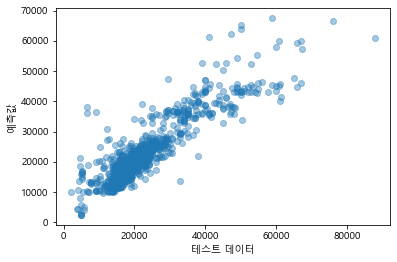

In [11]:
mlr=LinearRegression()
mlr.fit(x1_train,y1_train)
y1_predict=mlr.predict(x1_test)
plt.scatter(y1_test,y1_predict,alpha=0.4)
plt.xlabel('테스트 데이터')
plt.ylabel('예측값')
plt.show

In [12]:
print(mlr.score(x1_train,y1_train))

0.7750081054241664


In [13]:
# Random Forest Regressor
att=['전용면적(㎡)','층','세대수','건축년도','초등학교','병원','공원','대형마트','백화점','주차대수','브랜드','주차관제','승강기','난방방식','복도유형','임대차3법']

rf_x1=df_month[att]
rf_y1=df_month[['전월세(만원)']]
x2_train, x2_test, y2_train, y2_test = train_test_split(rf_x1, rf_y1, train_size=0.8, test_size=0.2)

y2_train=np.array(y2_train).ravel()
y2_test=np.array(y2_test).ravel()

In [14]:
# GridSearchCV
params = { 'n_estimators' : [500,1000],
           'max_depth' : [6,8,10],
           'min_samples_leaf' : [4,6,8],
           'min_samples_split' : [2, 4, 6]
            }


rf_model = RandomForestRegressor(random_state = 0, n_jobs = -1)
grid_search = GridSearchCV(rf_model, param_grid = params, cv = 3, n_jobs = -1)
grid_search.fit(x2_train, y2_train)

print('best score:',grid_search.best_score_)
print('best parameter:',grid_search.best_params_)

best score: 0.8660118341568038
best parameter: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000}


In [15]:
rf_model2 = RandomForestRegressor(n_estimators = 1000, 
                                max_depth = 10,
                                min_samples_leaf = 4,
                                min_samples_split = 2,
                                random_state = 0,
                                n_jobs = -1)

In [16]:
rf_model2.fit(x2_train, y2_train)
score=rf_model2.score(x2_test, y2_test)
print('prediction score:',score)

prediction score: 0.8533943538447346
